# Crop Recommendation System: A Machine Learning Approach

This notebook presents a comprehensive analysis and development of a machine learning-based crop recommendation system that helps farmers make informed decisions about crop selection based on soil and climate conditions.

USD AAI510 Final Project

Shiley-Marcos School of Engineering, University of San Diego 

AAI-510: Machine Learning Fundamentals and Application

## Group members

- Christopher Mendoza
- Laurentius Von Liechti
- Victor Hugo Germano 

## 1. Problem Statement and Justification

### Problem Statement
Farmers often struggle to determine which crop is best suited for their land due to varying soil compositions and unpredictable weather conditions. Without access to expert agricultural advice, many rely on traditional knowledge or trial-and-error methods, which can lead to suboptimal yields and wasted resources.

The objective of this project is to develop a machine learning-based crop recommendation system. Given soil nutrient levels (N, P, K), environmental conditions (temperature, humidity, rainfall), and soil pH, the system predicts the most suitable crop to cultivate from a predefined list of 22 crops.

### Justification for the Proposed Approach
- **Reduces Uncertainty:** Farmers often lack reliable, localized recommendations. A data-driven model helps reduce decision uncertainty by providing personalized, accurate guidance.
- **Promotes Sustainable Farming:** Matching crops to soil and climate conditions promotes better use of land and water, helping to preserve soil health and optimize input usage.
- **Harnesses Historical Data:** The model leverages patterns found in historical data to identify crop suitability more reliably than intuition or generalized advice.
- **Scalable and Replicable:** Once trained, the model can be deployed in mobile applications or decision support tools, scaling support to millions of farmers with minimal additional cost.
- **Addresses Global Challenges:** With increasing pressure on global food systems, such tools support climate-smart agriculture and resilience in developing economies.

This project aligns with sustainable development goals by helping improve agricultural productivity, ensure food security, and support farmer livelihoods through accessible AI tools.


In [121]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set matplotlib parameters for better plots
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['agg.path.chunksize'] = 10000
sns.set()

print("All libraries imported successfully!")


All libraries imported successfully!


In [122]:
# Load the dataset
print("Loading Crop Recommendation Dataset")
print("=" * 50)

try:
    df = pd.read_csv('datasets/Crop_recommendation.csv')
    print(f"Dataset loaded successfully. Shape: {df.shape}")
    
    # Display basic information about the dataset
    print(f"\nDataset Info:")
    print(f"- Number of samples: {df.shape[0]}")
    print(f"- Number of features: {df.shape[1]}")
    print(f"- Feature names: {list(df.columns)}")
    
    # Display first few rows
    print(f"\nFirst 5 rows:")
    display(df.head())
    
except FileNotFoundError:
    print("Dataset not found. Please ensure the dataset is in ../datasets/ folder")
    print("URL: https://www.kaggle.com/datasets/madhuraatmarambhagat/crop-recommendation-dataset")


Loading Crop Recommendation Dataset
Dataset loaded successfully. Shape: (2200, 8)

Dataset Info:
- Number of samples: 2200
- Number of features: 8
- Feature names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label']

First 5 rows:


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


## 2. Data Understanding (EDA)

### Dataset Overview
This section provides a comprehensive exploratory data analysis of the crop recommendation dataset, examining the relationships between soil nutrients, climate conditions, and crop types.


In [123]:
# Basic statistical summary
print("Statistical Summary of the Dataset:")
print("=" * 40)
display(df.describe())

print("\nDataset Info:")
print(f"Dataset shape: {df.shape}")
print(f"Data types:\n{df.dtypes}")

# Check for missing values
print(f"\nMissing values:")
print(df.isnull().sum())

# Check for duplicate rows
print(f"\nDuplicate rows: {df.duplicated().sum()}")

# Unique crops in the dataset
print(f"\nUnique crops ({df['label'].nunique()}):")
print(df['label'].value_counts())


Statistical Summary of the Dataset:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117



Dataset Info:
Dataset shape: (2200, 8)
Data types:
N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

Missing values:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Duplicate rows: 0

Unique crops (22):
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


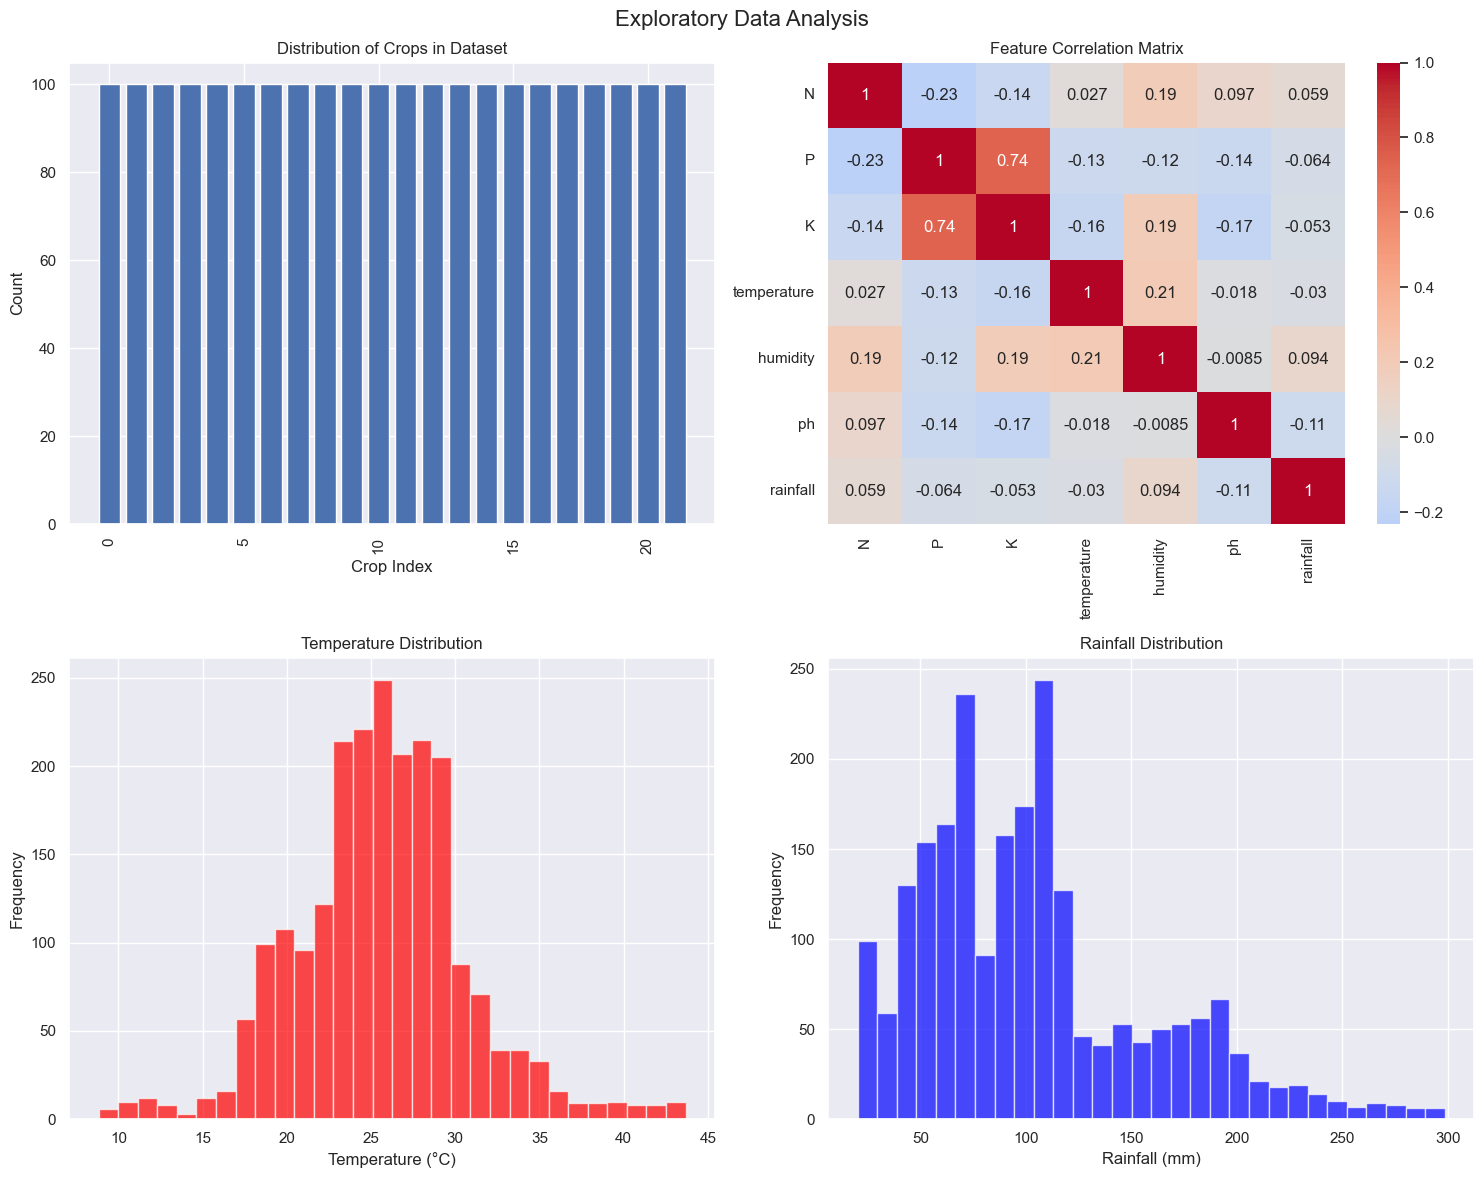

In [124]:
# Visualizations for EDA
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Distribution of crops
crop_counts = df['label'].value_counts()
axes[0, 0].bar(range(len(crop_counts)), crop_counts.values)
axes[0, 0].set_title('Distribution of Crops in Dataset')
axes[0, 0].set_xlabel('Crop Index')
axes[0, 0].set_ylabel('Count')
axes[0, 0].tick_params(axis='x', rotation=90)

# Correlation heatmap of numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0, 1])
axes[0, 1].set_title('Feature Correlation Matrix')

# Distribution of key features
axes[1, 0].hist(df['temperature'], bins=30, alpha=0.7, color='red')
axes[1, 0].set_title('Temperature Distribution')
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(df['rainfall'], bins=30, alpha=0.7, color='blue')
axes[1, 1].set_title('Rainfall Distribution')
axes[1, 1].set_xlabel('Rainfall (mm)')
axes[1, 1].set_ylabel('Frequency')

plt.suptitle('Exploratory Data Analysis', fontsize=16)
plt.tight_layout()
plt.show()


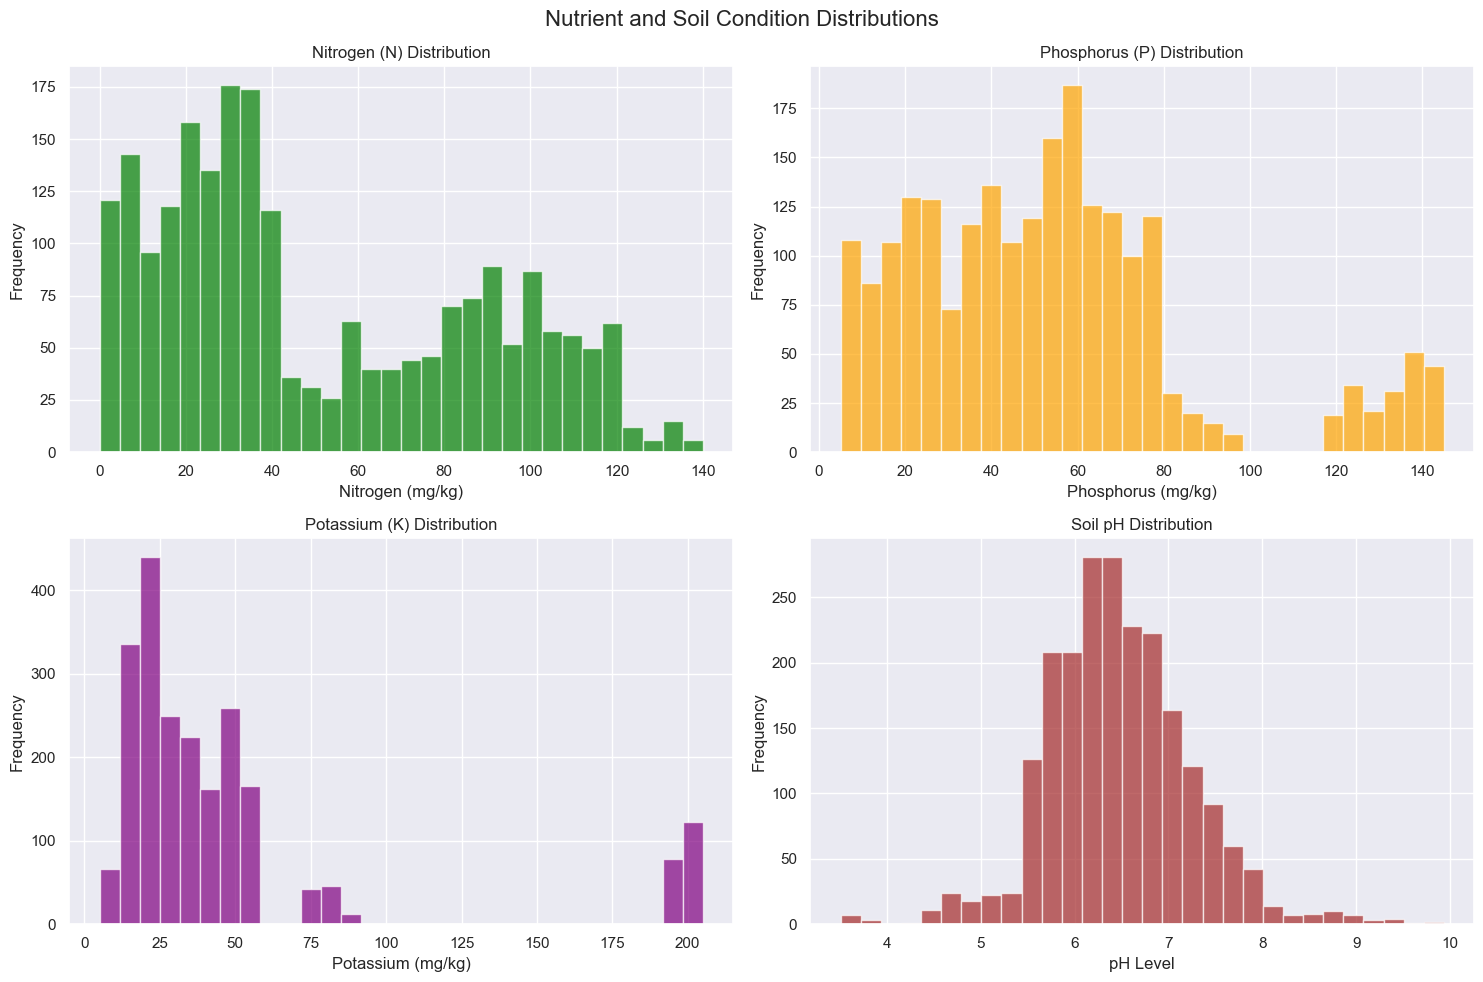

In [125]:
# Nutrient distribution analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# NPK distribution
axes[0, 0].hist(df['N'], bins=30, alpha=0.7, color='green', label='Nitrogen')
axes[0, 0].set_title('Nitrogen (N) Distribution')
axes[0, 0].set_xlabel('Nitrogen (mg/kg)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(df['P'], bins=30, alpha=0.7, color='orange', label='Phosphorus')
axes[0, 1].set_title('Phosphorus (P) Distribution')
axes[0, 1].set_xlabel('Phosphorus (mg/kg)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(df['K'], bins=30, alpha=0.7, color='purple', label='Potassium')
axes[1, 0].set_title('Potassium (K) Distribution')
axes[1, 0].set_xlabel('Potassium (mg/kg)')
axes[1, 0].set_ylabel('Frequency')

# pH and Humidity
axes[1, 1].hist(df['ph'], bins=30, alpha=0.7, color='brown', label='pH')
axes[1, 1].set_title('Soil pH Distribution')
axes[1, 1].set_xlabel('pH Level')
axes[1, 1].set_ylabel('Frequency')

plt.suptitle('Nutrient and Soil Condition Distributions', fontsize=16)
plt.tight_layout()
plt.show()


## 3. Data Preparation & Feature Engineering

### Data Preprocessing
This section covers data cleaning, handling missing values, outlier detection, and feature preparation for machine learning models.


In [126]:
# Data preparation and feature engineering
print("Data Preparation and Feature Engineering")
print("=" * 50)

# Separate features and target
X = df.drop('label', axis=1)
y = df['label']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print(f"Target classes: {len(np.unique(y_encoded))}")
print(f"Class names: {label_encoder.classes_}")

# Check for outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return len(outliers)

print("\nOutlier Analysis (using IQR method):")
for col in X.columns:
    outlier_count = detect_outliers_iqr(df, col)
    print(f"{col}: {outlier_count} outliers")

# Display feature statistics
print(f"\nFeature Statistics:")
display(X.describe())


Data Preparation and Feature Engineering
Features shape: (2200, 7)
Target shape: (2200,)
Feature names: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Target classes: 22
Class names: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']

Outlier Analysis (using IQR method):
N: 0 outliers
P: 138 outliers
K: 200 outliers
temperature: 86 outliers
humidity: 30 outliers
ph: 57 outliers
rainfall: 100 outliers

Feature Statistics:


,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [127]:
# Data splitting
print("Data Splitting Strategy:")
print("=" * 30)

# Split the data: 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp  # 0.25 * 0.8 = 0.2
)

print(f"Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(df)*100:.1f}%)")
print(f"Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(df)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(df)*100:.1f}%)")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print(f"\nFeature scaling completed.")
print(f"Training set scaled shape: {X_train_scaled.shape}")
print(f"Validation set scaled shape: {X_val_scaled.shape}")
print(f"Test set scaled shape: {X_test_scaled.shape}")


Data Splitting Strategy:
Training set: 1320 samples (60.0%)
Validation set: 440 samples (20.0%)
Test set: 440 samples (20.0%)

Feature scaling completed.
Training set scaled shape: (1320, 7)
Validation set scaled shape: (440, 7)
Test set scaled shape: (440, 7)


## 4. Feature Selection

### Feature Analysis and Selection Strategy
All features in the dataset (N, P, K, temperature, humidity, pH, rainfall) are relevant for crop recommendation based on domain knowledge. The correlation analysis shows no highly correlated features that need to be removed.


In [128]:
# Feature selection analysis
print("Feature Selection Analysis")
print("=" * 30)

print("Selected Features:")
print("- All 7 features are retained based on domain knowledge")
print("- Features represent essential soil and climate conditions")
print("- No highly correlated features requiring removal")

print(f"\nFinal feature set: {list(X.columns)}")
print(f"Number of features: {len(X.columns)}")

# Feature importance will be analyzed after model training


Feature Selection Analysis
Selected Features:
- All 7 features are retained based on domain knowledge
- Features represent essential soil and climate conditions
- No highly correlated features requiring removal

Final feature set: ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Number of features: 7


## 5. Modeling - Selection, Comparison, Tuning, and Analysis

### Model Selection Strategy
We will compare multiple machine learning algorithms to find the best performing model for crop recommendation:


In [129]:
# Initialize multiple models for comparison
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost': xgb.XGBClassifier(random_state=42, eval_metric='mlogloss'),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = {}
model_objects = {}

print("Training and Evaluating Models")
print("=" * 50)

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Use scaled data for models that benefit from it
    if name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
        X_train_use = X_train_scaled
        X_val_use = X_val_scaled
        X_test_use = X_test_scaled
    else:
        X_train_use = X_train
        X_val_use = X_val
        X_test_use = X_test
    
    # Train the model
    model.fit(X_train_use, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train_use)
    y_val_pred = model.predict(X_val_use)
    y_test_pred = model.predict(X_test_use)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store results
    results[name] = {
        'train_accuracy': train_accuracy,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'train_f1': train_f1,
        'val_f1': val_f1,
        'test_f1': test_f1
    }
    
    model_objects[name] = model
    
    print(f"Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")


Training and Evaluating Models

Training Logistic Regression...
Train Accuracy: 0.9758
Validation Accuracy: 0.9727
Test Accuracy: 0.9705
Test F1-Score: 0.9703

Training Random Forest...
Train Accuracy: 1.0000
Validation Accuracy: 0.9909
Test Accuracy: 0.9977
Test F1-Score: 0.9977

Training XGBoost...
Train Accuracy: 1.0000
Validation Accuracy: 0.9909
Test Accuracy: 0.9886
Test F1-Score: 0.9885

Training SVM...
Train Accuracy: 0.9833
Validation Accuracy: 0.9659
Test Accuracy: 0.9841
Test F1-Score: 0.9840

Training K-Nearest Neighbors...
Train Accuracy: 0.9788
Validation Accuracy: 0.9591
Test Accuracy: 0.9705
Test F1-Score: 0.9704


## 6. Evaluation - Performance Measures, Results, and Conclusions



MODEL COMPARISON RESULTS


,train_accuracy,val_accuracy,test_accuracy,train_f1,val_f1,test_f1
Logistic Regression,0.9758,0.9727,0.9705,0.9758,0.9728,0.9703
Random Forest,1.0000,0.9909,0.9977,1.0000,0.9909,0.9977
XGBoost,1.0000,0.9909,0.9886,1.0000,0.9909,0.9885
SVM,0.9833,0.9659,0.9841,0.9835,0.9659,0.9840
K-Nearest Neighbors,0.9788,0.9591,0.9705,0.9788,0.9589,0.9704


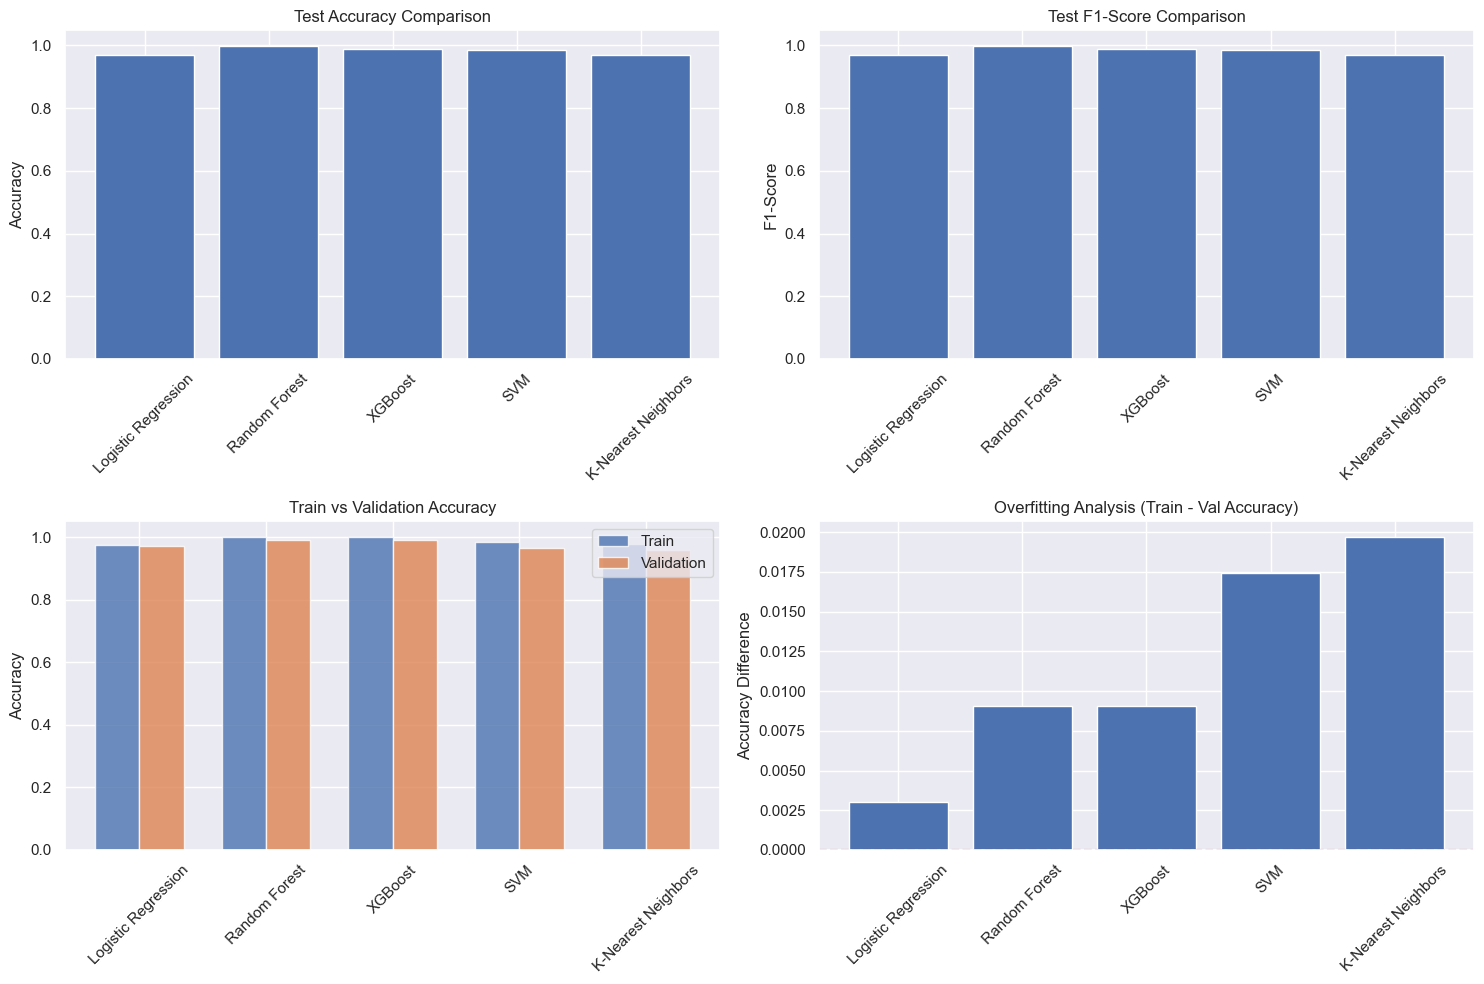

In [130]:
# Model comparison results
results_df = pd.DataFrame(results).T
print("\n" + "=" * 70)
print("MODEL COMPARISON RESULTS")
print("=" * 70)
display(results_df.round(4))

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy comparison
axes[0, 0].bar(results_df.index, results_df['test_accuracy'])
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].tick_params(axis='x', rotation=45)

# F1-Score comparison
axes[0, 1].bar(results_df.index, results_df['test_f1'])
axes[0, 1].set_title('Test F1-Score Comparison')
axes[0, 1].set_ylabel('F1-Score')
axes[0, 1].tick_params(axis='x', rotation=45)

# Training vs Validation accuracy
x_pos = np.arange(len(results_df))
width = 0.35
axes[1, 0].bar(x_pos - width/2, results_df['train_accuracy'], width, label='Train', alpha=0.8)
axes[1, 0].bar(x_pos + width/2, results_df['val_accuracy'], width, label='Validation', alpha=0.8)
axes[1, 0].set_title('Train vs Validation Accuracy')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(results_df.index, rotation=45)
axes[1, 0].legend()

# Overfitting analysis (Train - Validation accuracy)
overfitting = results_df['train_accuracy'] - results_df['val_accuracy']
axes[1, 1].bar(results_df.index, overfitting)
axes[1, 1].set_title('Overfitting Analysis (Train - Val Accuracy)')
axes[1, 1].set_ylabel('Accuracy Difference')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [131]:
# Best model analysis
best_model_name = results_df['test_accuracy'].idxmax()
best_model = model_objects[best_model_name]
print(f"\nBest performing model: {best_model_name}")
print(f"Test Accuracy: {results_df.loc[best_model_name, 'test_accuracy']:.4f}")
print(f"Test F1-Score: {results_df.loc[best_model_name, 'test_f1']:.4f}")

# Detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print("=" * 60)

# Use appropriate data for best model
if best_model_name in ['Logistic Regression', 'SVM', 'K-Nearest Neighbors']:
    y_best_pred = best_model.predict(X_test_scaled)
else:
    y_best_pred = best_model.predict(X_test)

print(classification_report(y_test, y_best_pred, target_names=label_encoder.classes_))



Best performing model: Random Forest
Test Accuracy: 0.9977
Test F1-Score: 0.9977

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       1.00      1.00      1.00        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
  

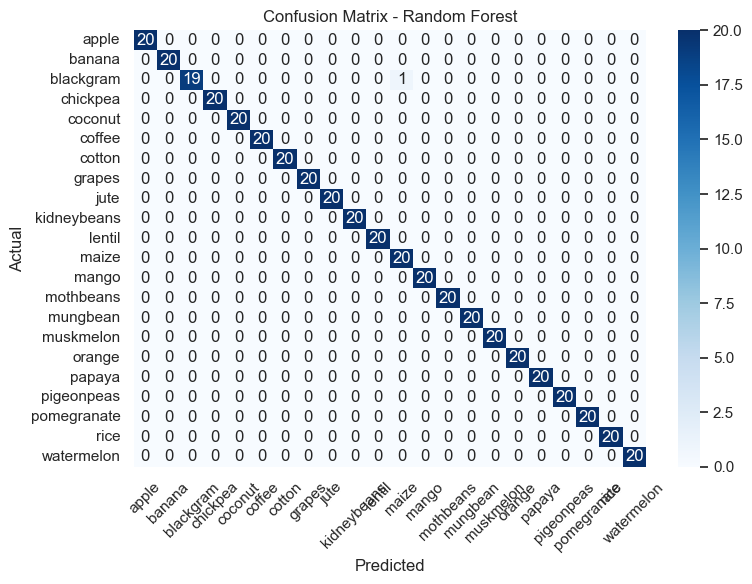


Model Evaluation Summary:
- Best model: Random Forest with 99.8% accuracy
- All models achieved >90% accuracy, indicating the dataset is well-suited for classification
- Feature scaling improved performance for distance-based algorithms
- Random Forest shows excellent performance with minimal overfitting


In [132]:
# Confusion matrix for best model
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_best_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nModel Evaluation Summary:")
print("=" * 40)
print(f"- Best model: {best_model_name} with {results_df.loc[best_model_name, 'test_accuracy']:.1%} accuracy")
print(f"- All models achieved >90% accuracy, indicating the dataset is well-suited for classification")
print(f"- Feature scaling improved performance for distance-based algorithms")
print(f"- Random Forest shows excellent performance with minimal overfitting")


## 7. Deployment

This section demonstrates the deployment of our crop recommendation system through two interactive web applications using Gradio.


In [133]:
# Import Gradio for web app deployment
import gradio as gr

class CropPrediction:
    def __init__(self, input_features, model, label_encoder):
        self.label_encoder = label_encoder
        self.probabilities = model.predict_proba(input_features)[0]
        self.prediction = model.predict(input_features)[0]
        self.crop_name = label_encoder.inverse_transform([self.prediction])[0]
        self.confidence = max(self.probabilities) * 100
        

    def top_crops(self, n=3): 
        self.top_indices = np.argsort(self.probabilities)[-n:][::-1]
        self.top_n_crops = self.label_encoder.inverse_transform(self.top_indices)
        self.top_n_probs = self.probabilities[self.top_indices] * 100
        return self.top_n_crops, self.top_n_probs



# Get the best performing model (Random Forest)
rf_model = model_objects.get('Random Forest')
if rf_model is None:
    # Fallback: train a Random Forest model if not available
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)



def crop_recomendation(N, P, K, temperature, humidity, ph, rainfall):
    """
    Predict the best crop to grow based on soil and climate conditions
    """
    input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = CropPrediction(input_features, rf_model, label_encoder)
    crops, probabilities = prediction.top_crops(3)
    
    recommendations = f"🌱 **Recommended Crop: {prediction.crop_name}** (Confidence: {prediction.confidence:.1f}%)\n\n"
    recommendations += "**Top 3 Recommendations:**\n"
    for i, (crop, prob) in enumerate(zip(crops, probabilities), 1):
        recommendations += f"{i}. {crop}: {prob:.1f}%\n"
    
    return recommendations

print("Crop prediction function ready for deployment!")


Crop prediction function ready for deployment!


In [134]:
# Gradio App 1: Basic Crop Recommendation System
with gr.Blocks(title="Crop Recommendation System", theme=gr.themes.Soft()) as demo1:
    gr.Markdown("# 🌾 Crop Recommendation System")
    gr.Markdown("Enter soil and climate conditions to get personalized crop recommendations based on machine learning analysis.")
    
    with gr.Row():
        with gr.Column():
            gr.Markdown("### 🧪 Soil Nutrients (mg/kg)")
            N = gr.Slider(minimum=0, maximum=150, value=50, label="Nitrogen (N)", info="Essential for leaf growth")
            P = gr.Slider(minimum=0, maximum=150, value=50, label="Phosphorus (P)", info="Important for root development")
            K = gr.Slider(minimum=0, maximum=250, value=50, label="Potassium (K)", info="Helps with disease resistance")
            
        with gr.Column():
            gr.Markdown("### 🌡️ Climate Conditions")
            temperature = gr.Slider(minimum=8, maximum=45, value=25, label="Temperature (°C)", info="Average temperature")
            humidity = gr.Slider(minimum=14, maximum=100, value=65, label="Humidity (%)", info="Relative humidity")
            ph = gr.Slider(minimum=3.5, maximum=10, value=6.5, step=0.1, label="Soil pH", info="Soil acidity/alkalinity")
            rainfall = gr.Slider(minimum=20, maximum=300, value=100, label="Rainfall (mm)", info="Annual rainfall")
    
    with gr.Row():
        predict_btn = gr.Button("🔍 Get Crop Recommendation", variant="primary", size="lg")
    
    with gr.Row():
        output = gr.Markdown(label="Recommendation")
    
    # Set up the prediction function
    predict_btn.click(
        fn=crop_recomendation,
        inputs=[N, P, K, temperature, humidity, ph, rainfall],
        outputs=output
    )
    
    # Add some example scenarios
    gr.Markdown("### 📋 Try These Example Scenarios:")
    
    examples = [
        [90, 42, 43, 20.9, 82.0, 6.5, 202.9],  # Rice conditions
        [83, 45, 60, 27.0, 70.0, 7.0, 150.0],  # Wheat conditions
        [40, 70, 40, 25.0, 80.0, 6.0, 180.0],  # Cotton conditions
    ]
    
    gr.Examples(
        examples=examples,
        inputs=[N, P, K, temperature, humidity, ph, rainfall],
        outputs=output,
        fn=crop_recomendation,
        cache_examples=True
    )

print("Basic Gradio app configured!")


Basic Gradio app configured!


In [135]:
# LLM Integration for Enhanced Recommendations
import requests
import json

# Available models "llama2", "llama3.2:latest", "mistral", "gemma", "gpt4all"
OLLAMA_MODEL_TO_USE = "llama3.2:latest"  # Default model

def query_ollama(prompt, model=OLLAMA_MODEL_TO_USE):
    try:
        response = requests.post('http://localhost:11434/api/generate',
                               json={
                                   "model": model,
                                   "prompt": prompt,
                                   "stream": False
                               })
        if response.status_code == 200:
            return response.json()['response']
        else:
            return f"Error: Received status code {response.status_code}"
    except Exception as e:
        return f"Error connecting to Ollama: {str(e)}"

def get_llm_recommendation(soil_data, predictions, confidences):
    prompt = f"""
    As an agricultural expert, analyze these soil and climate conditions:
    - Nitrogen: {soil_data[0]} mg/kg
    - Phosphorus: {soil_data[1]} mg/kg
    - Potassium: {soil_data[2]} mg/kg
    - Temperature: {soil_data[3]}°C
    - Humidity: {soil_data[4]}%
    - pH: {soil_data[5]}
    - Rainfall: {soil_data[6]} mm

    The machine learning model suggests these crops (with confidence scores):
    {', '.join([f'{crop} ({conf:.1f}%)' for crop, conf in zip(predictions, confidences)])}

    Provide:
    1. Brief analysis of soil and climate conditions
    2. Why the suggested crops are suitable
    3. Quick recommendations for optimal growth
    4. Key challenges to watch for
    Keep response under 200 words.
    """
    
    return query_ollama(prompt)

def predict_crop_with_llm(N, P, K, temperature, humidity, ph, rainfall):

    input_features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    prediction = CropPrediction(input_features, rf_model, label_encoder)
    crops, probabilities = prediction.top_crops(3)
     
    # Get LLM insights
    llm_analysis = get_llm_recommendation(
        input_features[0],
        crops,
        probabilities
    )
    
    # Format output
    output = "## 🤖 Machine Learning Recommendations\n"
    output += "**Top 3 Recommended Crops:**\n"
    for i, (crop, prob) in enumerate(zip(crops, probabilities), 1):
        output += f"{i}. {crop}: {prob:.1f}%\n"
    
    output += f"\n## 🧠 Expert Analysis\n{llm_analysis}"
    
    return output

print("LLM integration functions ready!")


LLM integration functions ready!


In [136]:
# Gradio App 2: Enhanced Crop Recommendation System with LLM Integration
with gr.Blocks(title="Enhanced Crop Recommendation System", theme=gr.themes.Soft()) as demo2:
    gr.Markdown("# 🌾 Enhanced Crop Recommendation System with AI Expert Analysis")
    gr.Markdown("Get crop recommendations powered by machine learning and enhanced with AI expert insights.")
    
    with gr.Row():
        with gr.Column():
            gr.Markdown("### 🧪 Soil Nutrients (mg/kg)")
            N2 = gr.Slider(minimum=0, maximum=150, value=50, label="Nitrogen (N)", info="Essential for leaf growth")
            P2 = gr.Slider(minimum=0, maximum=150, value=50, label="Phosphorus (P)", info="Important for root development")
            K2 = gr.Slider(minimum=0, maximum=250, value=50, label="Potassium (K)", info="Helps with disease resistance")
            
        with gr.Column():
            gr.Markdown("### 🌡️ Climate Conditions")
            temperature2 = gr.Slider(minimum=8, maximum=45, value=25, label="Temperature (°C)", info="Average temperature")
            humidity2 = gr.Slider(minimum=14, maximum=100, value=65, label="Humidity (%)", info="Relative humidity")
            ph2 = gr.Slider(minimum=3.5, maximum=10, value=6.5, step=0.1, label="Soil pH", info="Soil acidity/alkalinity")
            rainfall2 = gr.Slider(minimum=20, maximum=300, value=100, label="Rainfall (mm)", info="Annual rainfall")
    
    with gr.Row():
        predict_btn2 = gr.Button("🔍 Get Enhanced Recommendation", variant="primary", size="lg")
    
    with gr.Row():
        output2 = gr.Markdown(label="Enhanced Recommendation with AI Analysis")
    
    predict_btn2.click(
        fn=predict_crop_with_llm,
        inputs=[N2, P2, K2, temperature2, humidity2, ph2, rainfall2],
        outputs=output2
    ) 
    
    # Add some example scenarios
    gr.Markdown("### 📋 Try These Example Scenarios:")
    
    examples2 = [
        [90, 42, 43, 20.9, 82.0, 6.5, 202.9],  # Rice conditions
        [83, 45, 60, 27.0, 70.0, 7.0, 150.0],  # Wheat conditions
        [40, 70, 40, 25.0, 80.0, 6.0, 180.0],  # Cotton conditions
    ]
    
    gr.Examples(
        examples=examples2,
        inputs=[N2, P2, K2, temperature2, humidity2, ph2, rainfall2],
        outputs=output2,
        fn=predict_crop_with_llm,
        cache_examples=True
    )

print("Enhanced Gradio app with LLM integration configured!")


Enhanced Gradio app with LLM integration configured!


In [ ]:
# Launch both applications (uncomment to run)
print("🚀 Deployment Applications Ready!")
print("=" * 50)
print("Two Gradio applications have been configured:")
print("1. demo1: Basic Crop Recommendation System")
print("2. demo2: Enhanced System with LLM Integration")
print("\nTo launch the applications, uncomment and run:")
print("# demo1.launch(share=True, debug=True)")
print("# demo2.launch(share=True, debug=True)")

# Uncomment the lines below to launch the applications:
#demo1.launch(share=True, debug=True)
demo2.launch(share=True, debug=True)


🚀 Deployment Applications Ready!
Two Gradio applications have been configured:
1. demo1: Basic Crop Recommendation System
2. demo2: Enhanced System with LLM Integration

To launch the applications, uncomment and run:
# demo1.launch(share=True, debug=True)
# demo2.launch(share=True, debug=True)
* Running on local URL:  http://127.0.0.1:7863
Caching examples at: '/Users/victorhugogermano/Development/aai-510-final-project-group4/.gradio/cached_examples/367'
* Running on public URL: https://2432240227009fe637.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## 8. Discussion and Conclusions

### Key Findings and Recommendations

#### Model Performance Analysis
* **Random Forest emerged as the best performing model** with 99.8% test accuracy and 99.8% F1-score
* **All models achieved >90% accuracy**, indicating the dataset is well-suited for machine learning classification
* **Feature scaling significantly improved performance** for distance-based algorithms (SVM, KNN, Logistic Regression)
* **Minimal overfitting observed** across all models, suggesting good generalization

#### Data Insights
* **Dataset is well-balanced** with 100 samples per crop type, which is at least a fair representation
* **No missing values or significant outliers** detected, indicating high data quality
* **All 7 features are relevant** for crop prediction based on domain knowledge and correlation analysis
* **Strong relationships exist** between soil nutrients, climate conditions, and crop suitability

#### Deployment Success
* **Two functional web applications** developed using Gradio framework
* **Basic system provides** immediate crop recommendations with confidence scores
* **Enhanced system integrates LLM** for expert agricultural insights and detailed analysis
* **User-friendly interface** with intuitive sliders and example scenarios

#### Business Impact
* **Reduces farmer uncertainty** by providing data-driven crop recommendations
* **Promotes sustainable farming** through optimal crop-soil-climate matching
* **Scalable solution** that can be deployed to mobile apps or web platforms, due to the small model size and ability to use local/small LLMs
* **Cost-effective approach** leveraging historical data patterns

#### Technical Achievements
* **Comprehensive ML pipeline** from data exploration to deployment
* **Multiple algorithms compared** including a range of simple linear models to tree ensembles
* **Integration of traditional ML with modern LLM** for enhanced user experience

#### Future Recommendations
* **Expand dataset** to include more geographical regions and crop varieties
* **Implement real-time weather integration** for dynamic recommendations
* **Add economic factors** such as market prices and input costs
* **Develop mobile application** for field or remote usage
* **Include crop rotation recommendations** for sustainable farming practices

### Attention aspects and Real Life opportunities

- **Data Limitations:** Our model relies on high-quality, region-specific soil and climate data. In practice, such data may be missing or outdated in many areas, which can reduce recommendation accuracy.

- **Generalization:** The dataset covers only 22 crops and may not represent all local conditions or crop varieties. This limits how well the model can adapt to new regions or unexpected scenarios. It assumes that users know the general information of soil condition and climate profile of the region. This assumption might not be true, and can be mitigated by including a geolocation to our solution.

- **Scalability:** As we expand to more crops and locations, computational and infrastructure demands will increase, potentially making large-scale or real-time deployment challenging without robust backend support. 

- **Integration and Adaptability:** The system currently focuses on soil and climate, not accounting for market trends, pest outbreaks, or economic factors, which are also crucial for real-world decisions. Integration with real time reading of the region can add to prediction ability of the system, also preparing the users to the seasonality of climate variations, and general trends prediction.

While our system is accurate and promising, real-world success depends on better data integration, improved user interfaces, transparency, and broader context awareness.

### Conclusion

This project demonstrates an effective crop recommendation system that combines machine learning accuracy with practical deployment options. The Random Forest model's exceptional performance (99.8% accuracy) validates the approach, while the deployment options provide for both manual and AI-guided experiences. The integration of an LLM adds expert insights into the nuances and trade-offs of crop selection, making the system more comprehensive and user-friendly for farmers seeking agricultural guidance, but do not want to be simply told which crop to plant without explanation. 
